<a href="https://colab.research.google.com/github/RealMyeong/Going_Deeper_NLP/blob/main/Transformer_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 불러오고 확인

In [1]:
# %%bash
# apt-get update
# apt-get install g++ openjdk-8-jdk python-dev python3-dev
# pip3 install JPype1
# pip3 install konlpy

In [2]:
# %env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [3]:
# # Mecab 설치
# !apt-get update
# !apt-get install g++ openjdk-8-jdk 
# !pip3 install konlpy JPype1-py3
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import konlpy
from konlpy.tag import Mecab


In [5]:

file_path = '/content/drive/MyDrive/AIFFEL/GoingDeeper_NLP/12_Transformer챗봇/ChatbotData .csv'
data = pd.read_csv(file_path)
data.head(10)

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
5,SD카드 망가졌어,다시 새로 사는 게 마음 편해요.,0
6,SD카드 안돼,다시 새로 사는 게 마음 편해요.,0
7,SNS 맞팔 왜 안하지ㅠㅠ,잘 모르고 있을 수도 있어요.,0
8,SNS 시간낭비인 거 아는데 매일 하는 중,시간을 정하고 해보세요.,0
9,SNS 시간낭비인데 자꾸 보게됨,시간을 정하고 해보세요.,0


In [6]:
data[-10:]

,Q,A,label
11813,회사에 좋아하는 남자가 생겼어 어떡하지?,사랑하기 힘든 관계인가봐요.,2
11814,회사에서 어떤 사람이랑 자꾸 눈 마추쳐.,눈 마주치는 게 우연인지 잘 살펴 보세요.,2
11815,회식 중이라고 하는데 연락이 안돼.,정신 없이 바쁠지도 몰라요. 조금만 더 기다려보고 물어보는게 좋을 것 같아요.,2
11816,회식하는데 나만 챙겨줘. 썸임?,호감이 있을 수도 있어요. 그렇지만 조금 더 상황을 지켜보세요.,2
11817,후회 없이 사랑하고 싶어,진심으로 다가가 보세요.,2
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2
11822,힘들어서 결혼할까봐,도피성 결혼은 하지 않길 바라요.,2


In [7]:
len(data)

11823

In [8]:
questions = (data['Q'])
answers = (data['A'])

In [9]:
len(questions), len(answers)

(11823, 11823)

## 2. 데이터 정제

In [10]:
# 전처리 함수 정의
def preprocess_sentence(sentence):
  sentence = sentence.lower().strip()
  sentence = re.sub(r"[^0-9a-zA-Z가-힣ㄱ-ㅎㅏ-ㅣ.!?,]+", " ", sentence)

  return sentence

In [11]:
n_dup_q = list(set(questions))

In [12]:
len(n_dup_q)

11662

## 3. 데이터 토큰화

토큰화에는 KoNLPy의 mecab 클래스를 사용합니다.

아래 조건을 만족하는 build_corpus() 함수를 구현하세요!

1. 소스 문장 데이터와 타겟 문장 데이터를 입력으로 받습니다.
2. 데이터를 앞서 정의한 preprocess_sentence() 함수로 정제하고, 토큰화합니다.
3. 토큰화는 전달받은 토크나이즈 함수를 사용합니다. 이번엔 mecab.morphs 함수를 전달하시면 됩니다.
4. 토큰의 개수가 일정 길이 이상인 문장은 데이터에서 제외합니다.
5. 중복되는 문장은 데이터에서 제외합니다. 소스 : 타겟 쌍을 비교하지 않고 소스는 소스대로 타겟은 타겟대로 검사합니다. 중복 쌍이 흐트러지지 않도록 유의하세요!

구현한 함수를 활용하여 questions 와 answers 를 각각 que_corpus , ans_corpus 에 토큰화하여 저장합니다.




In [13]:

def build_corpus(question, answer):

  mecab = Mecab()
  cleaned_q = [preprocess_sentence(x) for x in question]
  cleaned_a = [preprocess_sentence(x) for x in answer]

  que_corpus = [mecab.morphs(sen) for sen in cleaned_q]
  ans_corpus = [mecab.morphs(sen) for sen in cleaned_a]



  que_len_list = [[len(sen), index] for index, sen in enumerate(que_corpus)]
  ans_len_list = [[len(sen), index] for index, sen in enumerate(ans_corpus)]
  
  filtered_q = []
  filtered_a = []
  for q, a in zip(que_len_list, ans_len_list):
    if 2< q[0] <= 50 and 2< a[0] <= 50:
      filtered_q.append(que_corpus[q[1]])
      filtered_a.append(ans_corpus[a[1]])
  
  return filtered_q, filtered_a
  # return que_corpus, ans_corpus


In [14]:
que_corpus, ans_corpus = build_corpus(questions, answers)
print(len(que_corpus))
print(que_corpus[:5])
print(len(ans_corpus))
print(ans_corpus[:5])

11301
[['12', '시', '땡', '!'], ['1', '지망', '학교', '떨어졌', '어'], ['3', '박', '4', '일', '놀', '러', '가', '고', '싶', '다'], ['3', '박', '4', '일', '정도', '놀', '러', '가', '고', '싶', '다'], ['ppl', '심하', '네']]
11301
[['하루', '가', '또', '가', '네요', '.'], ['위로', '해', '드립니다', '.'], ['여행', '은', '언제나', '좋', '죠', '.'], ['여행', '은', '언제나', '좋', '죠', '.'], ['눈살', '이', '찌푸려', '지', '죠', '.']]


In [15]:
# 나중에 성능 평가에 사용할 문장 10개 미리 뽑아내줌.
enc_val = que_corpus[-10:]
dec_val = ans_corpus[-10:]

que_corpus = que_corpus[:-10]
ans_corpus = ans_corpus[:-10]


In [16]:
enc_val

[['회사', '에', '좋', '아', '하', '는', '남자', '가', '생겼', '어', '어떡', '하', '지', '?'],
 ['회사', '에서', '어떤', '사람', '이랑', '자꾸', '눈', '마추', '쳐', '.'],
 ['회식', '중', '이', '라고', '하', '는데', '연락', '이', '안', '돼', '.'],
 ['회식', '하', '는데', '나', '만', '챙겨', '줘', '.', '썸', '임', '?'],
 ['후회', '없이', '사랑', '하', '고', '싶', '어'],
 ['훔쳐', '보', '는', '것', '도', '눈치', '보임', '.'],
 ['훔쳐', '보', '는', '것', '도', '눈치', '보임', '.'],
 ['흑기사', '해', '주', '는', '짝', '남', '.'],
 ['힘든', '연애', '좋', '은', '연애', '라는', '게', '무슨', '차이', '일까', '?'],
 ['힘들', '어서', '결혼', '할까봐']]

In [17]:
dec_val

[['사랑', '하', '기', '힘든', '관계', '인가', '봐요', '.'],
 ['눈', '마주치', '는', '게', '우연', '인지', '잘', '살펴', '보', '세요', '.'],
 ['정신',
  '없이',
  '바쁠',
  '지도',
  '몰라요',
  '.',
  '조금',
  '만',
  '더',
  '기다려',
  '보',
  '고',
  '물',
  '어',
  '보',
  '는',
  '게',
  '좋',
  '을',
  '것',
  '같',
  '아요',
  '.'],
 ['호감',
  '이',
  '있',
  '을',
  '수',
  '도',
  '있',
  '어요',
  '.',
  '그렇지만',
  '조금',
  '더',
  '상황',
  '을',
  '지켜보',
  '세요',
  '.'],
 ['진심', '으로', '다가가', '보', '세요', '.'],
 ['티', '가', '나', '니까', '눈치', '가', '보이', '는', '거', '죠', '!'],
 ['훔쳐', '보', '는', '거', '티나', '나', '봐요', '.'],
 ['설렜', '겠', '어요', '.'],
 ['잘', '헤어질', '수', '있', '는', '사이', '여부', '인', '거', '같', '아요', '.'],
 ['도피성', '결혼', '은', '하', '지', '않', '길', '바라', '요', '.']]

## 4. Augmentation

우리에게 주어진 데이터는 1만 개가량으로 적은 편에 속합니다. 이럴 때에 사용할 수 있는 테크닉을 배웠으니 활용해 봐야겠죠? Lexical Substitution을 실제로 적용해 보도록 하겠습니다.

아래 링크를 참고하여 한국어로 사전 훈련된 Embedding 모델을 다운로드합니다. Korean (w) 가 Word2Vec으로 학습한 모델이며 용량도 적당하므로 사이트에서 Korean (w)를 찾아 다운로드하고, ko.bin 파일을 얻으세요!

[Kyubyong/wordvectors](https://github.com/Kyubyong/wordvectors)  

다운로드한 모델을 활용해 데이터를 Augmentation 하세요! 앞서 정의한 lexical_sub() 함수를 참고하면 도움이 많이 될 겁니다.

Augmentation된 que_corpus 와 원본 ans_corpus 가 병렬을 이루도록, 이후엔 반대로 원본 que_corpus 와 Augmentation된 ans_corpus 가 병렬을 이루도록 하여 전체 데이터가 원래의 3배가량으로 늘어나도록 합니다.

In [18]:
import gensim

emb_file_path = '/content/drive/MyDrive/AIFFEL/GoingDeeper_NLP/12_Transformer챗봇/ko/ko.bin'
ko_model = gensim.models.Word2Vec.load(emb_file_path)
a = ko_model.wv.most_similar("강아지")

print(a[:5])

[('고양이', 0.7290452718734741), ('거위', 0.7185635566711426), ('토끼', 0.7056223154067993), ('멧돼지', 0.6950401067733765), ('엄마', 0.6934334635734558)]


In [19]:
# Lexical Substitution 구현하기
import random
def lexical_sub(sentence, word2vec):
    toks = sentence
    
    try:
        _from = random.choice(toks)
        replace_list = []
        for i in range(2):
          _to = word2vec.wv.most_similar(_from)[i][0]
          replace_list.append(_to)
        
    except:   # 단어장에 없는 단어
        return None
    
    res_list = []
    for i in range(2):
      res = ""
      for tok in toks:
        if tok is _from:
          res += replace_list[i] + " "
        else: res += tok + " "
      res_list.append(res)

    return res_list

In [20]:
augment_q = []
for i in range(len(que_corpus)):
  aug_list = lexical_sub(que_corpus[i], ko_model)
  try:
    augment_q.append([aug_list[0], aug_list[1], i])
  except:
    pass


In [21]:
augment_a = []
for i in range(len(ans_corpus)):
  aug_list = lexical_sub(ans_corpus[i], ko_model)
  try:
    augment_a.append([aug_list[0], aug_list[1], i])
  except:
    pass

- Augmentation된 문장 2개와 소스 문장의 인덱스가 들어가있음.
- 인덱스를 이용해서 타겟 문장과 연결해줄것.

In [22]:
print(augment_q[1])
print(augment_a[1])

['3 김 4 일 놀 러 가 고 싶 다 ', '3 최 4 일 놀 러 가 고 싶 다 ', 2]
['무릎 해 드립니다 . ', '꿇 해 드립니다 . ', 1]


In [23]:
original_que = que_corpus.copy()
original_ans = ans_corpus.copy()

In [24]:
original_que[1]

['1', '지망', '학교', '떨어졌', '어']

In [25]:
# Augmentation된 질문 추가
for i in range(len(augment_q)):
  que_corpus.append(augment_q[i][0].split())
  que_corpus.append(augment_q[i][1].split())
  ans_corpus.append(original_ans[augment_q[i][2]])
  ans_corpus.append(original_ans[augment_q[i][2]])

In [26]:
print(que_corpus[-3:])
print(ans_corpus[-3:])

[['확실히', '좋', '아', '하', '는', '데', '도', '관심', '있었', '는', '거', '티', '안', '내', '려고', '선', '톡', '안', '하', '고', '일부러', '늦', '게', '보내', '고', '그러', '는', '사람', '도', '있', '어요', '?'], ['주식회사', '짝', '남', '오빠', '게임', '초대', '톡', '옴', '.'], ['자회사', '짝', '남', '오빠', '게임', '초대', '톡', '옴', '.']]
[['많이', '있', '어요', '.'], ['설렜', '을', '텐데', '아쉽', '겠', '어요', '.'], ['설렜', '을', '텐데', '아쉽', '겠', '어요', '.']]


In [27]:
# Augmentation된 답변 추가
for i in range(len(augment_a)):
  ans_corpus.append(augment_a[i][0].split())
  ans_corpus.append(augment_a[i][1].split())
  que_corpus.append(original_que[augment_a[i][2]])
  que_corpus.append(original_que[augment_a[i][2]])

In [28]:
print(que_corpus[-3:])
print(ans_corpus[-3:])

[['확실히', '좋', '아', '하', '는', '데', '도', '관심', '있', '는', '거', '티', '안', '내', '려고', '선', '톡', '안', '하', '고', '일부러', '늦', '게', '보내', '고', '그러', '는', '사람', '도', '있', '어요', '?'], ['홧김', '에', '짝', '남', '한테', '고백', '했', '다', '.'], ['홧김', '에', '짝', '남', '한테', '고백', '했', '다', '.']]
[['많', '있', '어요', '.'], ['화끈', '하', '시', '네요', '는데'], ['화끈', '하', '시', '네요', '으니']]


In [29]:
# Augmentation후 데이터 길이
print(len(que_corpus))
print(len(ans_corpus))

50735
50735


In [30]:
# Random Noise Injection 구현하기
def random_noise(sentence, word2vec):
    toks_1 = sentence.copy()
    toks_2 = sentence.copy()

    try:
        _from = random.choice(toks_1)
        inject_list = []
        for i in range(2):
          _to = word2vec.wv.most_similar(_from)[i][0]
          inject_list.append(_to)
        
    except:   # 단어장에 없는 단어
        return None
    
    res_list = []

    index = random.sample(range(len(toks_1)),2)

    toks_1.insert(index[0], inject_list[0])
    res_list.append(toks_1)

    toks_2.insert(index[1], inject_list[1])
    res_list.append(toks_2)

    return res_list

In [31]:
noise_q = []
for i in range(len(original_que)):
  noise_list = random_noise(original_que[i], ko_model)
  try:
    noise_q.append([noise_list[0], noise_list[1], i])
  except:
    pass

In [32]:
noise_q[:2]

[[['12', '시가', '시', '땡', '!'], ['12', '시', '시의', '땡', '!'], 0],
 [['1', '지망', '학교의', '학교', '떨어졌', '어'],
  ['강습소', '1', '지망', '학교', '떨어졌', '어'],
  1]]

In [33]:
noise_a = []
for i in range(len(original_ans)):
  noise_list = random_noise(original_ans[i], ko_model)
  try:
    noise_a.append([noise_list[0], noise_list[1], i])
  except:
    pass

In [34]:
noise_a[:2]

[[['하루', '가', '또', '가', '각기', '네요', '.'],
  ['설로', '하루', '가', '또', '가', '네요', '.'],
  0],
 [['해의', '위로', '해', '드립니다', '.'], ['위로', '해', '다음해', '드립니다', '.'], 1]]

In [35]:
# Random Noise Injection 질문 추가
for i in range(len(noise_q)):
  que_corpus.append(noise_q[i][0])
  que_corpus.append(noise_q[i][1])
  ans_corpus.append(original_ans[noise_q[i][2]])
  ans_corpus.append(original_ans[noise_q[i][2]])

In [36]:
print(que_corpus[-10:-4])
print(ans_corpus[-10:-4])

[['혼자', '가', '편하', '다는', '짝', '놀드', '녀', '에게', '들이댔', '음', '.'], ['혼자', '가', '머지않', '편하', '다는', '짝', '녀', '에게', '들이댔', '음', '.'], ['혼자', '만', '금방', '설레', '고', '혼자', '서', '끝내', '는', '짝사랑', '그만', '할래', '.'], ['혼자', '만', '설레', '고', '혼자', '서', '끝내', '는', '그냥', '짝사랑', '그만', '할래', '.'], ['확실히', '날', '좋', '아', '하', '는', '걸', '아', '는', '남자', '랑', '친구', '가', '될', '수', '있', '명확히', '을까', '?'], ['확실히', '날', '좋', '아', '하', '분명히', '는', '걸', '아', '는', '남자', '랑', '친구', '가', '될', '수', '있', '을까', '?']]
[['혼자', '가', '편하', '다는', '것', '이', '거절', '의', '뜻', '은', '아니', '었', '을까요', '.'], ['혼자', '가', '편하', '다는', '것', '이', '거절', '의', '뜻', '은', '아니', '었', '을까요', '.'], ['맘고생', '많', '았', '어요', '.'], ['맘고생', '많', '았', '어요', '.'], ['그', '사람', '을', '위해서', '는', '그러', '면', '안', '돼요', '.'], ['그', '사람', '을', '위해서', '는', '그러', '면', '안', '돼요', '.']]


In [37]:
# Random Noise Injection 답변 추가
for i in range(len(noise_a)):
  ans_corpus.append(noise_a[i][0])
  ans_corpus.append(noise_a[i][1])
  que_corpus.append(original_que[noise_a[i][2]])
  que_corpus.append(original_que[noise_a[i][2]])

In [38]:
print(que_corpus[-10:-4])
print(ans_corpus[-10:-4])

[['혼자', '만', '설레', '고', '혼자', '서', '끝내', '는', '짝사랑', '그만', '할래', '.'], ['혼자', '만', '설레', '고', '혼자', '서', '끝내', '는', '짝사랑', '그만', '할래', '.'], ['화이트데이', '에', '고백', '할까요', '?'], ['화이트데이', '에', '고백', '할까요', '?'], ['화장', '안', '했', '는데', '썸남', '이', '영통', '걸', '었', '어', '.', '어떡', '해', '?'], ['화장', '안', '했', '는데', '썸남', '이', '영통', '걸', '었', '어', '.', '어떡', '해', '?']]
[['맘고생', '많', '았', '어요', '수많', '.'], ['맘고생', '많', '았', '높', '어요', '.'], ['선물', '을', '는데', '주', '면서', '솔직', '하', '고', '당당', '하', '게', '고백', '해', '보', '세요', '.'], ['선물', '을', '주', '면서', '솔직', '하', '고', '당당', '하', '게', '고백', '해', '보', '으니', '세요', '.'], ['화장실', '불빛', '으로', '좀', '멀리', '가리', '으로서', '고', '해', '보', '세요', '.'], ['화장실', '불빛', '으로', '이', '좀', '멀리', '가리', '고', '해', '보', '세요', '.']]


In [39]:
# Augmentation후 데이터 길이
print(len(que_corpus))
print(len(ans_corpus))

90179
90179


## 5. 데이터 벡터화

답변 문장의 앞 뒤에 시작 토큰과 마무리 토큰 추가해줌.

패딩의 최대 길이는 토큰화된 문장의 길이를 출력해서 정해줌

In [40]:
# target 문장에 시작 토큰과 마무리 토큰 추가해줌.
ans_corpus = [['<start>'] + sen + ['<end>'] for sen in ans_corpus]

# 테스트용 데이터에도 추가
dec_val = [['<start>'] + sen + ['<end>'] for sen in dec_val]

print(ans_corpus[:5])
print(dec_val[:5])

[['<start>', '하루', '가', '또', '가', '네요', '.', '<end>'], ['<start>', '위로', '해', '드립니다', '.', '<end>'], ['<start>', '여행', '은', '언제나', '좋', '죠', '.', '<end>'], ['<start>', '여행', '은', '언제나', '좋', '죠', '.', '<end>'], ['<start>', '눈살', '이', '찌푸려', '지', '죠', '.', '<end>']]
[['<start>', '사랑', '하', '기', '힘든', '관계', '인가', '봐요', '.', '<end>'], ['<start>', '눈', '마주치', '는', '게', '우연', '인지', '잘', '살펴', '보', '세요', '.', '<end>'], ['<start>', '정신', '없이', '바쁠', '지도', '몰라요', '.', '조금', '만', '더', '기다려', '보', '고', '물', '어', '보', '는', '게', '좋', '을', '것', '같', '아요', '.', '<end>'], ['<start>', '호감', '이', '있', '을', '수', '도', '있', '어요', '.', '그렇지만', '조금', '더', '상황', '을', '지켜보', '세요', '.', '<end>'], ['<start>', '진심', '으로', '다가가', '보', '세요', '.', '<end>']]


In [41]:
from collections import Counter

voc_data = que_corpus + ans_corpus + enc_val + dec_val

words = np.concatenate(voc_data).tolist()
counter = Counter(words)
print(len(counter))
counter = counter.most_common(30000-2)
vocab = ['<pad>', '<unk>'] + [key for key, _ in counter]
word_to_index = {word:index for index, word in enumerate(vocab)}
index_to_word = {index:word for word, index in word_to_index.items()}

9247


In [42]:
word_to_index

{'<pad>': 0,
 '<unk>': 1,
 '.': 2,
 '<start>': 3,
 '<end>': 4,
 '이': 5,
 '하': 6,
 '는': 7,
 '을': 8,
 '가': 9,
 '세요': 10,
 '어': 11,
 '고': 12,
 '좋': 13,
 '해': 14,
 '있': 15,
 '거': 16,
 '보': 17,
 '은': 18,
 '지': 19,
 '?': 20,
 '아': 21,
 '나': 22,
 '도': 23,
 '게': 24,
 '겠': 25,
 '에': 26,
 '사람': 27,
 '는데': 28,
 '예요': 29,
 '를': 30,
 '어요': 31,
 '다': 32,
 '같': 33,
 '한': 34,
 '사랑': 35,
 '싶': 36,
 '죠': 37,
 '없': 38,
 '네요': 39,
 '면': 40,
 '수': 41,
 '안': 42,
 '것': 43,
 '네': 44,
 '친구': 45,
 '의': 46,
 '아요': 47,
 '생각': 48,
 '잘': 49,
 '봐요': 50,
 '말': 51,
 '할': 52,
 '않': 53,
 '마음': 54,
 '너무': 55,
 '주': 56,
 '되': 57,
 '만': 58,
 '일': 59,
 '내': 60,
 '했': 61,
 '기': 62,
 '더': 63,
 '들': 64,
 '었': 65,
 '으로': 66,
 '연락': 67,
 '여자': 68,
 '남자': 69,
 '으니': 70,
 '이별': 71,
 '힘들': 72,
 '시간': 73,
 '많이': 74,
 '해요': 75,
 '남': 76,
 '한테': 77,
 '으면': 78,
 '에요': 79,
 '많': 80,
 '먹': 81,
 '에서': 82,
 '때': 83,
 '좀': 84,
 '았': 85,
 '썸': 86,
 '야': 87,
 '짝': 88,
 '길': 89,
 '저': 90,
 '뭐': 91,
 '받': 92,
 '요': 93,
 '건': 94,
 '괜찮': 95,
 '을까

In [43]:
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index[word] if word in word_to_index else word_to_index['<unk>'] for word in sentence]

def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<unk>' for index in encoded_sentence)  #[1:]를 통해 <BOS>를 제외

def vectorize(corpus, word_to_index):
    data = []
    for sen in corpus:
        sen = get_encoded_sentence(sen, word_to_index)
        data.append(sen)
    return data

que_train = vectorize(que_corpus, word_to_index)
ans_train = vectorize(ans_corpus, word_to_index)

enc_val = vectorize(enc_val, word_to_index)
dec_val = vectorize(dec_val, word_to_index)

print(len(que_train))
print(len(ans_train))


90179
90179


In [44]:
# source, target 문장의 토큰 최대 개수 확인

max_q_len = 0
max_a_len = 0
for q, a in zip(que_corpus, ans_corpus):
  if len(q) >= max_q_len:
    max_q_len = len(q)
  if len(a) >= max_a_len:
    max_a_len = len(a)
  
print('질문 최대 토큰 개수: ', max_q_len)
print('답변 최대 토큰 개수: ', max_a_len)

질문 최대 토큰 개수:  33
답변 최대 토큰 개수:  43


In [45]:

max_len = max(max_q_len, max_a_len)

enc_tensor = tf.keras.preprocessing.sequence.pad_sequences(que_train, padding='post', maxlen=max_len)
dec_tensor = tf.keras.preprocessing.sequence.pad_sequences(ans_train, padding='post', maxlen=max_len)
enc_val = tf.keras.preprocessing.sequence.pad_sequences(enc_val, padding='post', maxlen=max_len)
dec_val = tf.keras.preprocessing.sequence.pad_sequences(dec_val, padding='post', maxlen=max_len)

enc_train = enc_tensor
dec_train = dec_tensor


print(len(enc_train))
print(len(dec_train))
print(len(enc_val))
print(len(dec_val))
print(dec_val[1])
print(enc_val[1])

90179
90179
10
10
[   3  241  746    7   24 1791  278   49 2854   17   10    2    4    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]
[ 323   82  266   27  169  185  241 9247 5014    2    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [46]:
print(enc_train[1:3])
print('\n')
print(dec_train[1:3])

[[ 314 4721  582 1128   11    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [ 335 2266  599   59  212  249    9   12   36   32    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]]


[[   3  555   14 1636    2    4    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   3  242   18  744   13   37    2    4    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]]


In [47]:
enc_tensor.shape

(90179, 43)

## 6. 모델 설계 및 훈련

In [48]:
def positional_encoding(pos_len, d_model):
  def angle(pos, i):
    return pos / np.power(10000, (2*int(i))/np.float32(d_model))
  def get_posi_angle_vec(pos):
    return [angle(pos, i) for i in range(d_model)]
  
  sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos_len)])
  sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
  sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])

  return sinusoid_table

def generate_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  return seq[:, tf.newaxis, tf.newaxis, :]

def generate_lookahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask

def generate_masks(src, tgt):
  enc_mask = generate_padding_mask(src)
  dec_enc_mask = generate_padding_mask(src)

  dec_lookahead_mask = generate_lookahead_mask(tgt.shape[1])
  dec_tgt_padding_mask = generate_padding_mask(tgt)
  dec_mask = tf.maximum(dec_tgt_padding_mask, dec_lookahead_mask)

  return enc_mask, dec_enc_mask, dec_mask

class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, n_heads):
    super(MultiHeadAttention, self).__init__()
    self.d_model = d_model
    self.n_heads = n_heads
    self.depth = self.d_model // self.n_heads

    self.W_q = tf.keras.layers.Dense(d_model)
    self.W_k = tf.keras.layers.Dense(d_model)
    self.W_v = tf.keras.layers.Dense(d_model)

    self.linear = tf.keras.layers.Dense(d_model)
  
  def scaled_dot_product_attention(self, Q, K, V, mask):
    d_k = tf.cast(K.shape[1], tf.float32)
    QK = tf.matmul(Q, K, transpose_b = True)
    scaled_qk = QK / tf.math.sqrt(d_k)

    if mask is not None: scaled_qk += (mask * -1e9)

    attention = tf.nn.softmax(scaled_qk)
    out = tf.matmul(attention, V)
    
    return out, attention
  
  def split_heads(self, x):
    batch_size = x.shape[0]

    split_x = tf.reshape(x, (batch_size, -1, self.n_heads, self.depth))
    split_x = tf.transpose(split_x, perm=[0,2,1,3])

    return split_x
  
  def combine_heads(self, x):
    batch_size = x.shape[0]
    
    combined_x = tf.transpose(x, perm=[0,2,1,3])
    combined_x = tf.reshape(combined_x, (batch_size, -1, self.d_model))

    return combined_x
  
  def call(self, Q, K, V, mask):
    wq = self.W_q(Q)
    wk = self.W_k(K)
    wv = self.W_v(V)

    split_wq = self.split_heads(wq)
    split_wk = self.split_heads(wk)
    split_wv = self.split_heads(wv)

    out, attention_weights = self.scaled_dot_product_attention(split_wq, split_wk, split_wv, mask)
    out = self.combine_heads(out)
    out = self.linear(out)

    return out, attention_weights

class PoswiseFeedForwardNet(tf.keras.layers.Layer):
  def __init__(self, d_model, d_ff):
    super(PoswiseFeedForwardNet, self).__init__()
    self.d_model = d_model
    self.d_ff = d_ff
    self.ffn1 = tf.keras.layers.Dense(d_ff, activation='relu')
    self.ffn2 = tf.keras.layers.Dense(d_model)
  
  def call(self, x):
    out = x
    out = self.ffn1(out)
    out = self.ffn2(out)
    return out

class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, n_heads, d_ff, dropout):
    super(EncoderLayer, self).__init__()

    self.enc_self_attns = MultiHeadAttention(d_model, n_heads)
    self.ffn = PoswiseFeedForwardNet(d_model, d_ff)
    self.dropout = tf.keras.layers.Dropout(dropout)

    self.norm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.norm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

  def call(self, x, mask):
    residual = x
    out = self.norm1(x)
    out, enc_attns = self.enc_self_attns(out, out, out, mask)
    out = self.dropout(out)
    out += residual

    residual = out
    out = self.norm2(out)
    out = self.ffn(out)
    out = self.dropout(out)
    out += residual

    return out, enc_attns

class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, n_heads, d_ff, dropout):
    super(DecoderLayer, self).__init__()
    
    self.dec_self_attns = MultiHeadAttention(d_model, n_heads)
    self.dec_enc_self_attns = MultiHeadAttention(d_model, n_heads)
    self.ffn = PoswiseFeedForwardNet(d_model, d_ff)
    
    self.norm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.norm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.norm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout = tf.keras.layers.Dropout(dropout)

  def call(self, x, enc_out, causality_mask, padding_mask):
    residual = x
    out = self.norm1(x)
    out, dec_attns = self.dec_self_attns(out, out, out, padding_mask)
    out = self.dropout(out)
    out += residual

    residual = out
    out = self.norm2(out)
    out, dec_enc_attns = self.dec_enc_self_attns(out, enc_out, enc_out, causality_mask)
    out = self.dropout(out)
    out += residual

    residual = out
    out = self.norm3(out)
    out = self.ffn(out)
    out = self.dropout(out)
    out += residual

    return out, dec_attns, dec_enc_attns

class Encoder(tf.keras.Model):
  def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
    super(Encoder, self).__init__()

    self.n_layers = n_layers
    self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)]

  def call(self, x, mask):
    out = x

    enc_attns = []
    for i in range(self.n_layers):
      out, enc_attn = self.enc_layers[i](out, mask)
      enc_attns.append(enc_attn)
    
    return out, enc_attns

class Decoder(tf.keras.Model):
  def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
    super(Decoder, self).__init__()

    self.n_layers = n_layers
    self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout)
  
  def call(self, x, enc_out, causality_mask, padding_mask):
    out = x

    dec_attns = []
    dec_enc_attns = []
    for i in range(self.n_layers):
      out, dec_attn, dec_enc_attn = self.dec_layers[i](out, enc_out, causality_mask, padding_mask)
      dec_attns.append(dec_attn)
      dec_enc_attns.append(dec_enc_attn)
    
    return out, dec_attns, dec_enc_attns

class Transformer(tf.keras.Model):
    def __init__(self,
                    n_layers,
                    d_model,
                    n_heads,
                    d_ff,
                    src_vocab_size,
                    tgt_vocab_size,
                    pos_len,
                    dropout=0.2,
                    shared_fc=True,
                    shared_emb=False):
        super(Transformer, self).__init__()
        
        self.d_model = tf.cast(d_model, tf.float32)

        if shared_emb:
            self.enc_emb = self.dec_emb = \
            tf.keras.layers.Embedding(src_vocab_size, d_model)
        else:
            self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
            self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)

        self.pos_encoding = positional_encoding(pos_len, d_model)
        self.do = tf.keras.layers.Dropout(dropout)

        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)

        self.fc = tf.keras.layers.Dense(tgt_vocab_size)

        self.shared_fc = shared_fc

        if shared_fc:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))

    def embedding(self, emb, x):
        seq_len = x.shape[1]

        out = emb(x)

        if self.shared_fc: out *= tf.math.sqrt(self.d_model)

        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)

        return out

        
    def call(self, enc_in, dec_in, enc_mask, dec_enc_mask, dec_mask):
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)

        enc_out, enc_attns = self.encoder(enc_in, enc_mask)
        
        dec_out, dec_attns, dec_enc_attns = \
        self.decoder(dec_in, enc_out, dec_enc_mask, dec_mask)
        
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns

In [49]:
# 주어진 하이퍼파라미터로 Transformer 인스턴스 생성
transformer = Transformer(
    n_layers=4,
    d_model=128,
    n_heads=8,
    d_ff=256,
    src_vocab_size=30000,
    tgt_vocab_size=30000,
    pos_len=200,
    dropout=0.2,
    shared_fc=True,
    shared_emb=True)
		
d_model = 128

In [50]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()
        
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

In [51]:
learning_rate = LearningRateScheduler(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate,
                                        beta_1=0.9,
                                        beta_2=0.98, 
                                        epsilon=1e-9)

In [52]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [53]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    tgt_in = tgt[:, :-1]  # Decoder의 input
    gold = tgt[:, 1:]     # Decoder의 output과 비교하기 위해 right shift를 통해 생성한 최종 타겟

    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt_in)

    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = \
        model(src, tgt_in, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions)

    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return loss, enc_attns, dec_attns, dec_enc_attns

In [54]:
def evaluate(sentence, model):
    # sentence 전처리(enc_train과 같은 모양으로)
    sentence = preprocess_sentence(sentence)
    mecab = Mecab()
    pieces = mecab.morphs(sentence)
    tokens = get_encoded_sentence(pieces, word_to_index)

    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens],
                                                           maxlen=enc_train.shape[-1],
                                                           padding='post')
    
    ids = []
    
    output = tf.expand_dims([word_to_index['<start>']], 0) 
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = \
        generate_masks(_input, output)

        predictions, enc_attns, dec_attns, dec_enc_attns =\
        model(_input, 
              output,
              enc_padding_mask,
              combined_mask,
              dec_padding_mask)

        predicted_id = \
        tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()
        
        # 예측 단어가 종료 토큰일 경우
        if word_to_index['<end>'] == predicted_id:
            result = get_decoded_sentence(ids, index_to_word)
            return pieces, result, enc_attns, dec_attns, dec_enc_attns
        ##word_to_index
        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)

    result = get_decoded_sentence(ids, index_to_word)

    return pieces, result, enc_attns, dec_attns, dec_enc_attns

def translate(sentence, model):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = \
    evaluate(sentence, model)
    
    print('\nInput: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    return result

In [55]:
from tqdm import tqdm

BATCH_SIZE = 64
EPOCHS = 30

examples = ["1지망 학교 떨어졌어",
            "지루하다, 놀러가고 싶어.",
            "오늘 일찍 일어났더니 피곤하다.",
            "간만에 여자친구랑 데이트 하기로 했어.",
            "집에 있는다는 소리야."
]

loss_ = []

for epoch in range(EPOCHS):
    total_loss = 0
    
    idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
    random.shuffle(idx_list)
    t = tqdm(idx_list)

    for (batch, idx) in enumerate(t):
        batch_loss, enc_attns, dec_attns, dec_enc_attns = \
        train_step(enc_train[idx:idx+BATCH_SIZE],
                    dec_train[idx:idx+BATCH_SIZE],
                    transformer,
                    optimizer)

        total_loss += batch_loss
        loss_.append(batch_loss)

        t.set_description_str('Epoch %2d' % (epoch + 1))
        t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
        
    for example in examples:
        translate(example, transformer)

Epoch  1: 100%|██████████| 1410/1410 [01:45<00:00, 13.39it/s, Loss 4.6942]



Input: 1지망 학교 떨어졌어
Predicted translation: 좋 아 하 세요 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 같이 같이 같이 가요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 조금 씩 생각 하 세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 같이 가 라고 하 지 않 겠 네요 .

Input: 집에 있는다는 소리야.
Predicted translation: 혼자 가 있 어도 좋 아 봐요 .


Epoch  2: 100%|██████████| 1410/1410 [01:35<00:00, 14.71it/s, Loss 2.8606]



Input: 1지망 학교 떨어졌어
Predicted translation: 배우 면 좋 겠 네요 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 랑 놀 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 맛있 는 운동 먹 고 나 봐요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 사귀 다가 버거울 거 예요 .

Input: 집에 있는다는 소리야.
Predicted translation: 집 에서 도 안 안 안 안 안 안 안 안 안 안 안 안 안 안 안 안 안 하 고 있 나 봐요 .


Epoch  3: 100%|██████████| 1410/1410 [01:37<00:00, 14.50it/s, Loss 2.1510]



Input: 1지망 학교 떨어졌어
Predicted translation: 먼저 다가가 야죠 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 좋 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 오늘 은 쉬 는 건 아닌지 큰 좋 아요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 아무래도 그렇 겠 죠 .

Input: 집에 있는다는 소리야.
Predicted translation: 뭐 든 괜찮 아요 .


Epoch  4: 100%|██████████| 1410/1410 [01:38<00:00, 14.39it/s, Loss 1.5325]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 놀 고 놀 고 싶 어요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 아무렇 지 않 은 습관 을 들여 보 세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 좋 은 경험 이 되 길 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 건강 사람 을 위해 잘 쉬 요 .


Epoch  5: 100%|██████████| 1410/1410 [01:38<00:00, 14.37it/s, Loss 1.0871]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드릴게요 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 할 수 있 는 게 많 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 고생 많 았 어요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 현실 이 아니 라 생각 해요 .

Input: 집에 있는다는 소리야.
Predicted translation: 오래 집 에 해요 .


Epoch  6: 100%|██████████| 1410/1410 [01:38<00:00, 14.37it/s, Loss 0.8789]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 해 다음해 다음해 다음해 다음해 다음해 다음해 다음해 해 봐요 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 아무 생각 하 지 말 고 쉬 는 게 좋 아요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 짝사랑 은 함 이 많이 바뀌 되 었 나 봐요 .

Input: 집에 있는다는 소리야.
Predicted translation: 오래 사귀 면 돼요 .


Epoch  7: 100%|██████████| 1410/1410 [01:38<00:00, 14.37it/s, Loss 0.7648]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 할 때 저 랑 놀 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 일찍 주무세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 마음 이 좀 후련 하 죠 .

Input: 집에 있는다는 소리야.
Predicted translation: 좋 은 습관 이 에요 .


Epoch  8: 100%|██████████| 1410/1410 [01:38<00:00, 14.36it/s, Loss 0.6842]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 봐요 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 랑 놀 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 일찍 일어나 는 건 면 돼요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 당신 은 좀 좋아하 길 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 오래 살 면 요 .


Epoch  9: 100%|██████████| 1410/1410 [01:38<00:00, 14.37it/s, Loss 0.6234]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 같이 가요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 오늘 일찍 주무세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 충분히 힘들 었 다면 잠시 거 같 아요 .

Input: 집에 있는다는 소리야.
Predicted translation: 큰 용기 가 불필요 하 죠 .


Epoch 10: 100%|██████████| 1410/1410 [01:38<00:00, 14.38it/s, Loss 0.5868]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 같이 놀 러 가 세요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 오늘 일찍 감사 하 는 여행 을 나누 어 는데 아요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 마음 이 좀 걸리 겠 지만 잘 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 오래 하 면 사귀 는데 네요 .


Epoch 11: 100%|██████████| 1410/1410 [01:38<00:00, 14.36it/s, Loss 0.5570]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 다음해 다음해 다음해 다음해 해 봐요 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 요 !

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 일찍 일어나 는 새 를 아무것 는 것 도 중요 해요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 마음 도 편하 고 싶 어요 .

Input: 집에 있는다는 소리야.
Predicted translation: 오래 살 고 싶 은 사람 들 이 요 .


Epoch 12: 100%|██████████| 1410/1410 [01:37<00:00, 14.39it/s, Loss 0.5333]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 요 !

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 것 일어날 때 시간 를 만들 어 보 세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 그 분과 의 모든 시작 은 갖 지 않 아요 .

Input: 집에 있는다는 소리야.
Predicted translation: 괜찮 은 연락 이 네요 .


Epoch 13: 100%|██████████| 1410/1410 [01:38<00:00, 14.38it/s, Loss 0.5153]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 랑 놀 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 일찍 일어나 빨리 일어나 는 새 를 한번 하 쉬 어 보 세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 했 다면 했 다면 했 다면 했 나 봐요 .

Input: 집에 있는다는 소리야.
Predicted translation: 괜찮 은 사람 들 이 는데 네요 .


Epoch 14: 100%|██████████| 1410/1410 [01:38<00:00, 14.38it/s, Loss 0.5001]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 오자키 !

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 것 로 기억 하 고 있 어요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 스럽 게 잘 하 실 거 예요 .


Epoch 15: 100%|██████████| 1410/1410 [01:38<00:00, 14.38it/s, Loss 0.4830]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 요 !

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 용기 를 쓰 는 지 마세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 고민 하 고 있 다면 그게 맞 을 거 예요 .

Input: 집에 있는다는 소리야.
Predicted translation: 제 가 축하 해요 .


Epoch 16: 100%|██████████| 1410/1410 [01:38<00:00, 14.35it/s, Loss 0.4731]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 랑 한 잔 해요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 꼭 노력 하 고 있 어요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 인연 이 거기 까지 였 나 봐요 .

Input: 집에 있는다는 소리야.
Predicted translation: 제 가 있 잖아요 .


Epoch 17: 100%|██████████| 1410/1410 [01:38<00:00, 14.38it/s, Loss 0.4588]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 같이 가요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 일찍 쉬 는 새 는 시간 을 찾 아 는다는 있 어요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 좋 은 추억 이 되 길 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 네요 .


Epoch 18: 100%|██████████| 1410/1410 [01:38<00:00, 14.37it/s, Loss 0.4437]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 한테 도 요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 일찍 먹 는 새 는 시간 에 따라 를 힘들 어 하 지 니까요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 원 하 는 은 방법 은 그 자체 로 만나 세요 .

Input: 집에 있는다는 소리야.
Predicted translation: 네요 .


Epoch 19: 100%|██████████| 1410/1410 [01:38<00:00, 14.39it/s, Loss 0.4385]



Input: 1지망 학교 떨어졌어
Predicted translation: 무릎 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 으니 저 도 요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 이제 오늘 때문 일찍 먹 는 시간 을 정리 하 세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 인연 은 거기 까지 였 나 봐요 .

Input: 집에 있는다는 소리야.
Predicted translation: 제 도 좋 은 네요 .


Epoch 20: 100%|██████████| 1410/1410 [01:38<00:00, 14.38it/s, Loss 0.4271]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 으니 저 도 요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 꼭 자신 에게 시키 세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 직접 물 어 보 세요 .

Input: 집에 있는다는 소리야.
Predicted translation: 제 가 있 잖아요 .


Epoch 21: 100%|██████████| 1410/1410 [01:37<00:00, 14.39it/s, Loss 0.4227]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 랑 같이 놀 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 돼요 는데 저 도 시간 을 이 들 어요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 제 가 있 잖아요 .


Epoch 22: 100%|██████████| 1410/1410 [01:37<00:00, 14.40it/s, Loss 0.4091]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 랑 놀 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 꼭 쉬 어 는 시간 이 에요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 먼저 연락 을 해 보 세요 .


Epoch 23: 100%|██████████| 1410/1410 [01:38<00:00, 14.39it/s, Loss 0.3985]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 같이 할 때 가 바뀌 면 돼요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 고생 많 은 것 을 거 예요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 인연 이 여기 까지 였 나 봐요 .

Input: 집에 있는다는 소리야.
Predicted translation: 네요 .


Epoch 24: 100%|██████████| 1410/1410 [01:37<00:00, 14.41it/s, Loss 0.3897]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 요 !

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 몰라요 . 제 가 들 어 드릴게요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 제 가 있 잖아요 .


Epoch 25: 100%|██████████| 1410/1410 [01:37<00:00, 14.41it/s, Loss 0.3856]



Input: 1지망 학교 떨어졌어
Predicted translation: 무릎 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 랑 놀 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 어렵 일찍 정말 많이 조금 쉬 어 주 바랄게요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 먼저 연락 을 해 보 세요 .


Epoch 26: 100%|██████████| 1410/1410 [01:37<00:00, 14.41it/s, Loss 0.3793]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 다음해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 요 !

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 것 잡아먹 은 자신 을 좀 쉬 길 바랄게요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 괜찮 은 때 네요 .


Epoch 27: 100%|██████████| 1410/1410 [01:37<00:00, 14.39it/s, Loss 0.3773]



Input: 1지망 학교 떨어졌어
Predicted translation: 무릎 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 는데 요 !

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 힘들 어 하 는 것 는데요 바랄게요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 더 좋 은 사람 만날 수 있 을 거 예요 .


Epoch 28: 100%|██████████| 1410/1410 [01:37<00:00, 14.39it/s, Loss 0.3668]



Input: 1지망 학교 떨어졌어
Predicted translation: 해의 해의 다면 함께 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 랑 놀 아요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 좀 더 일찍 잠자리 에 들 어 보 세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 먼저 연락 을 해 보 세요 .


Epoch 29: 100%|██████████| 1410/1410 [01:37<00:00, 14.41it/s, Loss 0.3621]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 요 !

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 자 는 걸로 을 시작 하 세요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 먼저 사 는 사람 이 네요 .


Epoch 30: 100%|██████████| 1410/1410 [01:37<00:00, 14.39it/s, Loss 0.3600]



Input: 1지망 학교 떨어졌어
Predicted translation: 위로 해 드립니다 .

Input: 지루하다, 놀러가고 싶어.
Predicted translation: 저 도 요 .

Input: 오늘 일찍 일어났더니 피곤하다.
Predicted translation: 이제 일어날 시간 이 에요 .

Input: 간만에 여자친구랑 데이트 하기로 했어.
Predicted translation: 바랄게요 .

Input: 집에 있는다는 소리야.
Predicted translation: 네요 .


## 7. 성능 평가

In [56]:
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu

reference = "자연어 처리에서 트랜스포머는 꼭 자세히 알고 지나가야한다.".split()
candidate = "자 연어 처리의 트랜스포머는 자세히 알고 가야 된다.".split()

print("원문:", reference)
print("번역문:", candidate)
print("BLEU Score:", sentence_bleu([reference], candidate))

원문: ['자연어', '처리에서', '트랜스포머는', '꼭', '자세히', '알고', '지나가야한다.']
번역문: ['자', '연어', '처리의', '트랜스포머는', '자세히', '알고', '가야', '된다.']
BLEU Score: 7.176381577237209e-155


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [57]:
def calculate_bleu(reference, candidate, weights=[0.25, 0.25, 0.25, 0.25]):
    return sentence_bleu([reference],
                         candidate,
                         weights=weights,
                         smoothing_function=SmoothingFunction().method1)  # smoothing_function 적용

print("BLEU-1:", calculate_bleu(reference, candidate, weights=[1, 0, 0, 0]))
print("BLEU-2:", calculate_bleu(reference, candidate, weights=[0, 1, 0, 0]))
print("BLEU-3:", calculate_bleu(reference, candidate, weights=[0, 0, 1, 0]))
print("BLEU-4:", calculate_bleu(reference, candidate, weights=[0, 0, 0, 1]))

print("\nBLEU-Total:", calculate_bleu(reference, candidate))

BLEU-1: 0.375
BLEU-2: 0.14285714285714285
BLEU-3: 0.01666666666666667
BLEU-4: 0.02

BLEU-Total: 0.06500593260343691


In [58]:
def eval_bleu(src_corpus, tgt_corpus, verbose=True):
    total_score = 0.0
    sample_size = len(tgt_corpus)

    for idx in tqdm(range(sample_size)):
        src_tokens = src_corpus[idx]
        tgt_tokens = tgt_corpus[idx]
        
        src = []
        tgt = []
        
        for word in src_tokens:
            if word !=0 and word !=1 and word !=3 and word !=4:
                src.append(word)
        
        for word in tgt_tokens:
            if word != 0 and word != 3 and word !=4:
                tgt.append(word)

        src_sentence = get_decoded_sentence(src, index_to_word)
        tgt_sentence = get_decoded_sentence(tgt, index_to_word)
        
        
        reference = preprocess_sentence(tgt_sentence)
        candidate = translate(src_sentence, transformer)

        score = sentence_bleu([reference], candidate,
                              smoothing_function=SmoothingFunction().method1)
        total_score += score

        if verbose:
            print("Source Sentence: ", src_sentence)
            print("Model Prediction: ", candidate)
            print("Real: ", reference)
            print("Score: %lf\n" % score)

    print("Num of Sample:", sample_size)
    print("Total Score:", total_score / sample_size)

In [59]:
eval_bleu(enc_val, dec_val, verbose=True)

 10%|█         | 1/10 [00:01<00:09,  1.06s/it]


Input: 회사 에 좋 아 하 는 남자 가 생겼 어 어떡 하 지 ?
Predicted translation: 마음 으로 복잡 하 겠 어요 .
Source Sentence:  회사 에 좋 아 하 는 남자 가 생겼 어 어떡 하 지 ?
Model Prediction:  마음 으로 복잡 하 겠 어요 .
Real:  사랑 하 기 힘든 관계 인가 봐요 .
Score: 0.088817



 20%|██        | 2/10 [00:02<00:09,  1.20s/it]


Input: 회사 에서 어떤 사람 이랑 자꾸 눈 마추 쳐 .
Predicted translation: 용기 를 내 서 말 해 보 세요 .
Source Sentence:  회사 에서 어떤 사람 이랑 자꾸 눈 마추 쳐 .
Model Prediction:  용기 를 내 서 말 해 보 세요 .
Real:  눈 마주치 는 게 우연 인지 잘 살펴 보 세요 .
Score: 0.231516



 30%|███       | 3/10 [00:03<00:07,  1.01s/it]


Input: 회식 중 이 라고 하 는데 연락 이 안 돼 .
Predicted translation: 맛있 는 거 드세요 .
Source Sentence:  회식 중 이 라고 하 는데 연락 이 안 돼 .
Model Prediction:  맛있 는 거 드세요 .
Real:  정신 없이 바쁠 지도 몰라요 . 조금 만 더 기다려 보 고 물 어 보 는 게 좋 을 것 같 아요 .
Score: 0.004094



 40%|████      | 4/10 [00:03<00:05,  1.09it/s]


Input: 회식 하 는데 나 만 챙겨 줘 . 썸 임 ?
Predicted translation: 병원 가 보 세요 .
Source Sentence:  회식 하 는데 나 만 챙겨 줘 . 썸 임 ?
Model Prediction:  병원 가 보 세요 .
Real:  호감 이 있 을 수 도 있 어요 . 그렇지만 조금 더 상황 을 지켜보 세요 .
Score: 0.027054



 50%|█████     | 5/10 [00:06<00:07,  1.41s/it]


Input: 후회 없이 사랑 하 고 싶 어
Predicted translation: 후회 하 고 말 으로 하 는 것 도 원 하 는 사람 이 없 죠 .
Source Sentence:  후회 없이 사랑 하 고 싶 어
Model Prediction:  후회 하 고 말 으로 하 는 것 도 원 하 는 사람 이 없 죠 .
Real:  진심 으로 다가가 보 세요 .
Score: 0.082026



 60%|██████    | 6/10 [00:07<00:05,  1.47s/it]


Input: 훔쳐 보 는 것 도 눈치 보임 .
Predicted translation: 빨리 쉽 게 살 고 자신 이 가장 있 죠 .
Source Sentence:  훔쳐 보 는 것 도 눈치 보임 .
Model Prediction:  빨리 쉽 게 살 고 자신 이 가장 있 죠 .
Real:  티 가 나 니까 눈치 가 보이 는 거 죠 !
Score: 0.067198



 70%|███████   | 7/10 [00:09<00:04,  1.50s/it]


Input: 훔쳐 보 는 것 도 눈치 보임 .
Predicted translation: 빨리 쉽 게 살 고 자신 이 가장 있 죠 .
Source Sentence:  훔쳐 보 는 것 도 눈치 보임 .
Model Prediction:  빨리 쉽 게 살 고 자신 이 가장 있 죠 .
Real:  훔쳐 보 는 거 티나 나 봐요 .
Score: 0.023666



 80%|████████  | 8/10 [00:10<00:02,  1.31s/it]


Input: 흑기사 해 주 는 짝 남 .
Predicted translation: 직접 물 어 보 세요 .
Source Sentence:  흑기사 해 주 는 짝 남 .
Model Prediction:  직접 물 어 보 세요 .
Real:  설렜 겠 어요 .
Score: 0.101202



 90%|█████████ | 9/10 [00:11<00:01,  1.42s/it]


Input: 힘든 연애 좋 은 연애 라는 게 무슨 차이 일까 ?
Predicted translation: 언제 다 으니 그 사람 에 대한 예의 가 없 죠 .
Source Sentence:  힘든 연애 좋 은 연애 라는 게 무슨 차이 일까 ?
Model Prediction:  언제 다 으니 그 사람 에 대한 예의 가 없 죠 .
Real:  잘 헤어질 수 있 는 사이 여부 인 거 같 아요 .
Score: 0.026970



100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


Input: 힘들 어서 결혼 할까봐
Predicted translation: 말 도 해 주 세요 .
Source Sentence:  힘들 어서 결혼 할까봐
Model Prediction:  말 도 해 주 세요 .
Real:  도피성 결혼 은 하 지 않 길 바라 요 .
Score: 0.043075

Num of Sample: 10
Total Score: 0.06956178205078141


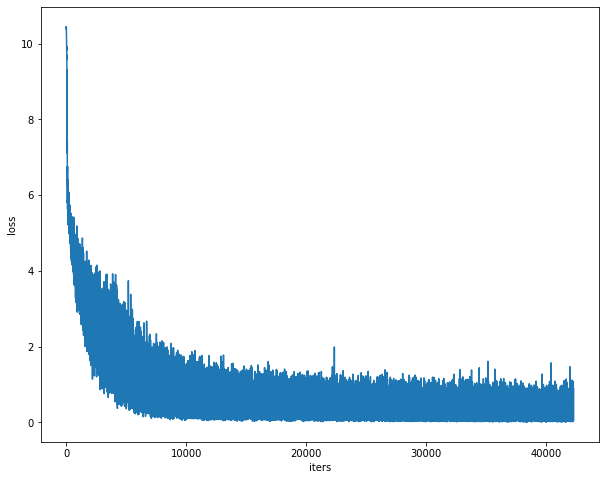

In [60]:
plt.figure(figsize=(10,8))
plt.plot(loss_)
plt.xlabel('iters')
plt.ylabel('loss')
plt.show()

## 8. 실험 결과 비교
